# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_simple

In [2]:
process = AeromapsProcess(read_json=True, models=models_simple, fleet=False)

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [3]:
# process.list_float_inputs()

 In the following, some main parameters are for instance set up.

In [4]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 3
process.parameters.growth_rate_2030_2040_short_range = 3
process.parameters.growth_rate_2040_2050_short_range = 3
process.parameters.growth_rate_2020_2030_medium_range = 3
process.parameters.growth_rate_2030_2040_medium_range = 3
process.parameters.growth_rate_2040_2050_medium_range = 3
process.parameters.growth_rate_2020_2030_long_range = 3
process.parameters.growth_rate_2030_2040_long_range = 3
process.parameters.growth_rate_2040_2050_long_range = 3
process.parameters.growth_rate_2020_2030_freight = 3
process.parameters.growth_rate_2030_2040_freight = 3
process.parameters.growth_rate_2040_2050_freight = 3

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain = 1.3
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain = 1.3
process.parameters.energy_per_ask_long_range_dropin_fuel_gain = 1.3



In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 250.0

In [9]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1



In [10]:
# CO2 prices

process.parameters.co2_tax_2020=54
process.parameters.co2_tax_2030=250
process.parameters.co2_tax_2040=500
process.parameters.co2_tax_2050=700

## Energy business as usual

In [11]:
process.parameters.biofuel_share_2030 = 0
process.parameters.biofuel_share_2040 = 0
process.parameters.biofuel_share_2050 = 0
process.parameters.electrofuel_share_2030 = 0
process.parameters.electrofuel_share_2040 = 0
process.parameters.electrofuel_share_2050 = 0

In [12]:
process.compute()

wtf


In [13]:
undiscounted_BAU=process.data['vector_outputs'].non_discounted_energy_expenses
dicounted_BAU=process.data['vector_outputs'].discounted_energy_expenses

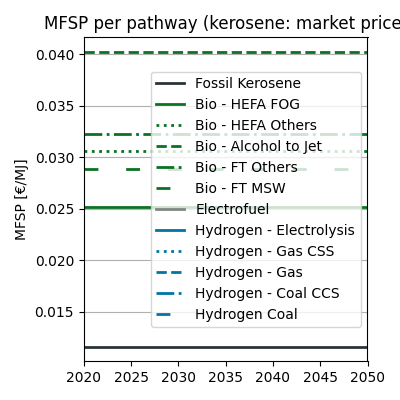

In [14]:
process.plot('energy_mfsp')

## Refuel EU like

In [15]:
## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range = 1.0

In [16]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]

# REFUELEU LIKE

process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0



In [17]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
# REFUELEU LIKE
process.parameters.biofuel_hefa_fog_share_2030 = 0.7
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 3.8
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 76.3
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 7.4
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4


## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 10
process.parameters.hydrogen_electrolysis_share_2040 = 50
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 10
process.parameters.hydrogen_gas_ccs_share_2040 = 30
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 10
process.parameters.hydrogen_coal_ccs_share_2040 = 10
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 70
process.parameters.hydrogen_gas_share_2040 = 10
process.parameters.hydrogen_gas_share_2050 = 0

In [18]:
#specific setup to 16% for mACC curve

process.parameters.aviation_biomass_allocated_share = 10
process.parameters.aviation_electricity_allocated_share = 10

In [19]:
process.compute()
undiscounted_refueleu=process.data['vector_outputs'].non_discounted_energy_expenses
dicounted_refueleu=process.data['vector_outputs'].discounted_energy_expenses

In [20]:
# process.data['vector_outputs']

KeyError: 'kerosene_market_price'

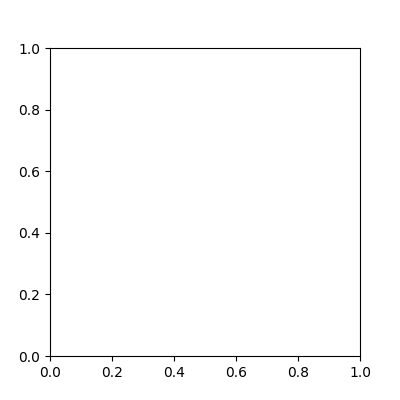

In [21]:
process.plot('energy_mfsp')

In [ ]:
co2_abated_refueleu=process.data['vector_outputs'].co2_emissions_including_load_factor-process.data['vector_outputs'].co2_emissions_including_energy

In [ ]:
co2_target=process.data['vector_outputs'].co2_emissions_including_energy

In [ ]:
process.data['vector_outputs']['cumulative_co2_emissions'][2050]

In [ ]:
process.list_available_plots()

In [ ]:
process.plot('biomass_resource_budget_assessment')

In [ ]:
process.plot('electricity_resource_budget_assessment')

In [ ]:
process

#### 

## Low-CAC first

In [ ]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
# # lowcost

process.parameters.biofuel_share_2030 = 4.92
process.parameters.biofuel_share_2040 = 27.87
process.parameters.biofuel_share_2050 = 57.37
process.parameters.electrofuel_share_2030 = 1.08
process.parameters.electrofuel_share_2040 = 6.13
process.parameters.electrofuel_share_2050 = 12.63


In [ ]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]


# LOWCOST
process.parameters.biofuel_hefa_fog_share_2030 = 1.12
process.parameters.biofuel_hefa_fog_share_2040 = 1.12
process.parameters.biofuel_hefa_fog_share_2050 = 1.12
process.parameters.biofuel_hefa_others_share_2030 = 15.27
process.parameters.biofuel_hefa_others_share_2040 = 15.27
process.parameters.biofuel_hefa_others_share_2050 = 15.27
process.parameters.biofuel_ft_others_share_2030 = 66.53
process.parameters.biofuel_ft_others_share_2040 = 66.53
process.parameters.biofuel_ft_others_share_2050 = 66.53
process.parameters.biofuel_ft_msw_share_2030 = 6.44
process.parameters.biofuel_ft_msw_share_2040 = 6.44
process.parameters.biofuel_ft_msw_share_2050 = 6.44


## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 100
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 0
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

In [ ]:
#specific setup to 16% for mACC curve

process.parameters.aviation_biomass_allocated_share = 10
process.parameters.aviation_electricity_allocated_share = 10

In [ ]:
process.compute()
undiscounted_lowcost=process.data['vector_outputs'].non_discounted_energy_expenses
dicounted_lowcost=process.data['vector_outputs'].discounted_energy_expenses

In [ ]:
process.plot('energy_carbon_tax_effect')

In [ ]:
process.plot('energy_mfsp')

In [ ]:
co2_abated_lowcost=process.data['vector_outputs'].co2_emissions_including_load_factor-process.data['vector_outputs'].co2_emissions_including_energy

## Low Carbon first

In [ ]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
# # lowcost

process.parameters.biofuel_share_2030 = 3.33
process.parameters.biofuel_share_2040 = 18.86
process.parameters.biofuel_share_2050 = 38.82
process.parameters.electrofuel_share_2030 = 2.67
process.parameters.electrofuel_share_2040 = 15.14
process.parameters.electrofuel_share_2050 = 31.18


In [ ]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
# # LOWCARB
process.parameters.biofuel_hefa_fog_share_2030 = 1.66
process.parameters.biofuel_hefa_fog_share_2040 = 1.66
process.parameters.biofuel_hefa_fog_share_2050 = 1.66
process.parameters.biofuel_hefa_others_share_2030 = 0.0
process.parameters.biofuel_hefa_others_share_2040 = 0.0
process.parameters.biofuel_hefa_others_share_2050 = 0.0
process.parameters.biofuel_ft_others_share_2030 = 98.34
process.parameters.biofuel_ft_others_share_2040 = 98.34
process.parameters.biofuel_ft_others_share_2050 = 98.34
process.parameters.biofuel_ft_msw_share_2030 = 0.0
process.parameters.biofuel_ft_msw_share_2040 = 0.0
process.parameters.biofuel_ft_msw_share_2050 = 0.0


## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 100
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 0
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

In [ ]:
#specific setup to 16% for mACC curve

process.parameters.aviation_biomass_allocated_share = 10
process.parameters.aviation_electricity_allocated_share = 10

In [ ]:
process.compute()
undiscounted_lowcarb=process.data['vector_outputs'].non_discounted_energy_expenses
dicounted_lowcarb=process.data['vector_outputs'].discounted_energy_expenses

In [ ]:
process.plot('energy_mfsp')

In [ ]:
co2_abated_lowcarb=process.data['vector_outputs'].co2_emissions_including_load_factor-process.data['vector_outputs'].co2_emissions_including_energy

In [ ]:
process.plot('electricity_resource_budget_assessment')

## Comparision of teh different blends

In [ ]:
dict1={'Homogeneous':undiscounted_refueleu/1000,'Low Carbon Abatement Cost': undiscounted_lowcost/1000, 'Low Carbon':undiscounted_lowcarb/1000, 'Business as usual':undiscounted_BAU/1000}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(dict1).plot()
plt.grid()
plt.ylabel('Annual energy expenses (B€)')

In [ ]:
print('BAU, R=3%', dicounted_BAU.sum())
print('Homogeneous, R=3%', dicounted_refueleu.sum())
print('Low CAC, R=3%', dicounted_lowcost.sum())
print('Low carbon, R=3%', dicounted_lowcarb.sum())

In [ ]:
fig, ax = plt.subplots()
names = ['Homogeneous', 'Low Carbon Abatement Cost', 'Low Carbon', 'Business as usual',]
discounted_vals = [dicounted_refueleu.sum(),dicounted_lowcost.sum(), dicounted_lowcarb.sum(), dicounted_BAU.sum(),]
ax.bar(names,discounted_vals)
ax.set_ylabel('Total discounted energy cost (M€)')
ax.grid(axis='y', linestyle='dashed')
ax.set_axisbelow(True)
for i, v in enumerate(discounted_vals):
    ax.text(i-0.25, v+50000, '{} Bn €'.format(str(int(v/1000))), color='dimgrey', fontweight='bold')

    



In [ ]:
print(undiscounted_lowcarb.sum()/co2_abated_lowcarb.sum())
print(undiscounted_lowcost.sum()/co2_abated_lowcost.sum())
print(undiscounted_refueleu.sum()/co2_abated_refueleu.sum())

In [ ]:
dict={'Homogeneous':co2_abated_refueleu,'Low Carbon Abatement Cost': co2_abated_lowcost, 'Low Carbon':co2_abated_lowcarb}

In [ ]:
fig, ax=plt.subplots(1,2)

pd.DataFrame(dict).plot(ax=ax[0])
ax[0].grid()
ax[0].set_ylabel('Annual $CO_2$ abatement by energy (Mt)')

pd.DataFrame(dict1).plot(ax=ax[1])
ax[1].grid()
ax[1].set_ylabel('Annual energy expenses (B€)')

## MACC region

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)

fig, ax = plt.subplots()

year=2030


# create a dataframe for the patways (use: sort the values by cincreasing carbon abatement cost)


pathways=["Bio - HEFA FOG",
"Bio - HEFA Others",
"Bio - Alcohol to Jet",
"Bio - FT MSW",
"Bio - FT Others",
# "Liquid Hydrogen",
"Electrofuel"]
    
abatement_potential=[elt/1000000 for elt in [process.data['vector_outputs'].abatement_potential_hefa_fog[year],
process.data['vector_outputs'].abatement_potential_hefa_others[year],
process.data['vector_outputs'].abatement_potential_atj[year],
process.data['vector_outputs'].abatement_potential_ft_msw[year],
process.data['vector_outputs'].abatement_potential_ft_others[year],
# process.data['vector_outputs'].abatement_potential_hydrogen_electrolysis[year],
process.data['vector_outputs'].abatement_potential_electrofuel[year]]]


energy_avail=[elt/1000000000000 for elt in [process.data['vector_outputs'].energy_avail_hefa_fog[year],
process.data['vector_outputs'].energy_avail_hefa_others[year],
process.data['vector_outputs'].energy_avail_atj[year],
process.data['vector_outputs'].energy_avail_ft_msw[year],
process.data['vector_outputs'].energy_avail_ft_others[year],
# process.data['vector_outputs'].energy_avail_hydrogen_electrolysis[year],
process.data['vector_outputs'].energy_avail_electrofuel[year]]]

    

abatement_effective=[elt/1000000 for elt in [process.data['vector_outputs'].abatement_effective_hefa_fog[year],
process.data['vector_outputs'].abatement_effective_hefa_others[year],
process.data['vector_outputs'].abatement_effective_atj[year],
process.data['vector_outputs'].abatement_effective_ft_msw[year],
process.data['vector_outputs'].abatement_effective_ft_others[year],
# process.data['vector_outputs'].abatement_effective_hydrogen_electrolysis[year],
process.data['vector_outputs'].abatement_effective_electrofuel[year]]]

    
carbon_abatement_cost=[process.data['vector_outputs'].carbon_abatement_cost_hefa_fog[year],
process.data['vector_outputs'].carbon_abatement_cost_hefa_others[year],
process.data['vector_outputs'].carbon_abatement_cost_atj[year],
process.data['vector_outputs'].carbon_abatement_cost_ft_msw[year],
process.data['vector_outputs'].carbon_abatement_cost_ft_others[year],
# process.data['vector_outputs'].carbon_abatement_cost_h2_electrolysis[year],
process.data['vector_outputs'].electrofuel_abatement_cost[year]
]


macc_df=pd.DataFrame(data=[abatement_potential,energy_avail, abatement_effective, carbon_abatement_cost], columns=pathways, index=['abatement_potential', 'energy_avail', 'abatement_effective', 'carbon_abatement_cost'])
macc_df=macc_df.transpose().sort_values(by='carbon_abatement_cost')


heights=macc_df['carbon_abatement_cost'].to_list()
names=macc_df.index.to_list()
heights.insert(0,0)
heights.append(heights[-1])

# MAx potential MACC
widths_potential= macc_df['abatement_potential'].to_list()
widths_potential.insert(0,0)
widths_potential.append(widths_potential[-1])

ax.step(np.cumsum(widths_potential)-widths_potential, heights, 'g', where='post', color="#335C67", label= "Marginal abatement cost" , linewidth=1.5)


#Effective scenario MACC

# widths_effective= macc_df['abatement_effective'].to_list()
# widths_effective.insert(0,0)
# widths_effective.append(widths_effective[-1])

# ax.step(np.cumsum(widths_effective)-widths_effective, heights, 'g', where='post', color="#335C67", label= "Scenario abatement cost" , linewidth=1.5)

fuel= macc_df.energy_avail.to_list()
fuel.insert(0,0)
widths_potential.pop()
ax2=ax.twinx()
ax2.plot(np.cumsum(widths_potential), np.cumsum(fuel), color="#9E2A2B", linestyle=':', label= "Energy potential", marker='x')

# ax.set_yscale('log')

ax2.axhline(y=process.data['vector_outputs'].energy_consumption_dropin_fuel[year]/1e12-process.data['vector_outputs'].energy_consumption_kerosene[year]/1e12, color='black', linewidth=1, linestyle='-.')
ax2.text(0, 3.75e2, 'Air transport alternative drop-in fuels use, 2050')

ax.grid(True, which="both", ls=':')
ax.set_ylabel('Carbon Abatement Cost (€/t$\mathregular{CO_2}$)')
ax2.set_ylabel('Energy potential (EJ)')
ax.set_xlabel('$\mathregular{CO_2}$ abatted (Mt)')
# ax.set_xlim(-0.02,0.84)
# ax.set_ylim(0,1000) 
# ax2.set_ylim(0,450)

ax.grid(True, which="both", ls=':')
ax.set_ylabel('Carbon Abatement Cost (€/t$\mathregular{CO_2}$)')

ax.set_xlabel('$\mathregular{CO_2}$ abatted (Mt)')
# ax.set_xlim(-0.02,0.84)
# ax.set_ylim(0,1000) 
# ax2.set_ylim(0,450)

# print(heights, np.cumsum(widths), names)



# overshoot_allocation=macc_df['abatement_effective']/macc_df['abatement_potential']*100


ax.text(np.cumsum(widths_potential)[0]+10, heights[1]-50, names[0])
ax.text(np.cumsum(widths_potential)[1]+10, heights[2]+18, names[1])
ax.text(np.cumsum(widths_potential)[2]+10, heights[3]-50, names[2])
ax.text(np.cumsum(widths_potential)[3]+10, heights[4]-50, names[3])
ax.text(np.cumsum(widths_potential)[4]+10, heights[5]-50, names[4])
ax.text(np.cumsum(widths_potential)[5]+10, heights[6]-50, names[5])
# ax.text(np.cumsum(widths_potential)[6]+0.005, heights[7]+18, names[6])

# # plt.ylim([1,2.8*10**3]) 

# # ax.get_yaxis().get_major_formatter().labelOnlyBase = False
fig.legend(fancybox=True, shadow=True,  bbox_to_anchor=(0.38, 0.85))




macc_df


In [ ]:
fig, ax = plt.subplots()


macc_df['abatement_intensity']=macc_df['abatement_potential']/macc_df['energy_avail']
macc_df=macc_df.sort_values(by='abatement_intensity', ascending=False)


heights=macc_df['carbon_abatement_cost'].to_list()
names=macc_df.index.to_list()
heights.insert(0,0)
heights.append(heights[-1])

# MAx potential MACC
widths_potential= macc_df['abatement_potential'].to_list()
widths_potential.insert(0,0)
widths_potential.append(widths_potential[-1])

ax.step(np.cumsum(widths_potential)-widths_potential, heights, 'g', where='post', color="#335C67", label= "Marginal Abatement Cost" , linewidth=1.5)


# Effective scenario MACC

# # MAx potential MACC
# widths_effective= macc_df['abatement_effective'].to_list()
# widths_effective.insert(0,0)
# widths_effective.append(widths_effective[-1])

# ax.step(np.cumsum(widths_effective)-widths_effective, heights, 'g', where='post', color="#335C67", label= "Scenario abatement cost and potential" , linewidth=1.5)

fuel= macc_df.energy_avail.to_list()
fuel.insert(0,0)
widths_potential.pop()
ax2=ax.twinx()
ax2.plot(np.cumsum(widths_potential), np.cumsum(fuel), color="#9E2A2B", linestyle=':', label= "Energy potential", marker='x')

# ax.set_yscale('log')

ax2.axhline(y=process.data['vector_outputs'].energy_consumption_dropin_fuel[year]/1e12-process.data['vector_outputs'].energy_consumption_kerosene[year]/1e12, color='black', linewidth=1, linestyle='-.')
ax2.text(0, 3.75e2, 'Air transport drop-in fuels use, 2050')


ax.grid(True, which="both", ls=':')
ax.set_ylabel('Carbon Abatement Cost (€/t$\mathregular{CO_2}$)')
ax2.set_ylabel('Energy potential (EJ)')
ax.set_xlabel('$\mathregular{CO_2}$ abatted (Mt)')
# ax.set_xlim(-0.02,0.84)
# ax.set_ylim(0,1000) 
# ax2.set_ylim(0,450)

ax.grid(True, which="both", ls=':')
ax.set_ylabel('Carbon Abatement Cost (€/t$\mathregular{CO_2}$)')

ax.set_xlabel('$\mathregular{CO_2}$ abatted (Mt)')
# ax.set_xlim(-0.02,0.84)
ax.set_xlim(0,2200) 
# ax2.set_ylim(0,450)

# print(heights, np.cumsum(widths), names)



# overshoot_allocation=macc_df['abatement_effective']/macc_df['abatement_potential']*100


ax.text(np.cumsum(widths_potential)[0]+10, heights[1]-50, names[0])
ax.text(np.cumsum(widths_potential)[1]+10, heights[2]-50, names[1])
ax.text(np.cumsum(widths_potential)[2]+10, heights[3]-50, names[2])
ax.text(np.cumsum(widths_potential)[3]+10, heights[4]-50, names[3])
ax.text(np.cumsum(widths_potential)[4]+10, heights[5]-50, names[4])
ax.text(np.cumsum(widths_potential)[5]+10, heights[6]-50, names[5])
# ax.text(np.cumsum(widths_potential)[6]+0.005, heights[7]+18, names[6])

# # plt.ylim([1,2.8*10**3]) 

# # ax.get_yaxis().get_major_formatter().labelOnlyBase = False
fig.legend(fancybox=True, shadow=True,  bbox_to_anchor=(0.38, 0.85))

In [ ]:
macc_df